In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

In [2]:
models_dict = {"rf":RandomForestRegressor,
               "knn":KNeighborsRegressor,
               "ada":AdaBoostRegressor,
               "lr":LinearRegression}

In [3]:
metrics_dict = {"r2":r2_score,
               "mse":mean_squared_error,
               "mae":mean_absolute_error}

In [5]:
df_land = pd.read_csv("../data/ARA02.20220508215353_good_price.csv")

In [6]:
df_land.head(3)

,STATISTIC,Statistic,TLIST(A1),Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE
0,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,-,State,Euro per Acre,6389.8
1,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE11,Border,Euro per Acre,4685.2
2,ARA02C01,Median Price per Acre,2013,2013,1,All Land Types,IE12,Midland,Euro per Acre,7114.6


In [7]:
df_land.tail(3)

,STATISTIC,Statistic,TLIST(A1),Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE
1725,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE23,Mid-West,Euro,31455465
1726,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE24,South-East,Euro,17396112.2
1727,ARA02C08,Value of Land Sold,2020,2020,3,Permanent Grassland,IE25,South-West,Euro,4446462


In [8]:
df_land.shape

(1728, 10)

In [36]:
df_land.columns

Index(['STATISTIC', 'Statistic', 'TLIST(A1)', 'Year', 'C03388V04075',
       'Type of Land Use', 'C02196V02652', 'Region', 'UNIT', 'VALUE'],
      dtype='object')

In [37]:
df_land.dtypes

STATISTIC           object
Statistic           object
TLIST(A1)            int64
Year                 int64
C03388V04075         int64
Type of Land Use    object
C02196V02652        object
Region              object
UNIT                object
VALUE               object
dtype: object

vimos que a coluna VALUE deveria ser floar mas está como object, então decidimos mudar o tipo para float

In [38]:
df_land["VALUE"] = df_land["VALUE"].astype("float")

ValueError: could not convert string to float: '.'

In [9]:
non_floats = []
for value in df_land["VALUE"]:
    try:
        float_ = float(value)
    except:
        if not value in non_floats:
            print(value)
            non_floats.append(value)

.


In [10]:
non_floats

['.']

In [11]:
mask = df_land["VALUE"] != "."

In [12]:
mask

0       True
1       True
2       True
3       True
4       True
        ... 
1723    True
1724    True
1725    True
1726    True
1727    True
Name: VALUE, Length: 1728, dtype: bool

In [13]:
df_land = df_land[mask].copy()

In [16]:
df_land.shape

(1608, 10)

In [14]:
df_land["VALUE"] = df_land["VALUE"].astype("float")

In [44]:
df_land.dtypes

STATISTIC            object
Statistic            object
TLIST(A1)             int64
Year                  int64
C03388V04075          int64
Type of Land Use     object
C02196V02652         object
Region               object
UNIT                 object
VALUE               float64
dtype: object

In [45]:
df_land.isna().sum()

STATISTIC           0
Statistic           0
TLIST(A1)           0
Year                0
C03388V04075        0
Type of Land Use    0
C02196V02652        0
Region              0
UNIT                0
VALUE               0
dtype: int64

In [46]:
df_land[df_land["TLIST(A1)"]!=df_land["Year"]]

,STATISTIC,Statistic,TLIST(A1),Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE


In [18]:
df_land.drop(columns=["STATISTIC","TLIST(A1)"], inplace = True)

In [48]:
df_land

,Statistic,Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE
0,Median Price per Acre,2013,1,All Land Types,-,State,Euro per Acre,6389.8
1,Median Price per Acre,2013,1,All Land Types,IE11,Border,Euro per Acre,4685.2
2,Median Price per Acre,2013,1,All Land Types,IE12,Midland,Euro per Acre,7114.6
3,Median Price per Acre,2013,1,All Land Types,IE13,West,Euro per Acre,4496.5
4,Median Price per Acre,2013,1,All Land Types,IE21,Dublin,Euro per Acre,10117.2
...,...,...,...,...,...,...,...,...
1723,Value of Land Sold,2020,3,Permanent Grassland,IE21,Dublin,Euro,2670000.0
1724,Value of Land Sold,2020,3,Permanent Grassland,IE22,Mid-East,Euro,28863564.4
1725,Value of Land Sold,2020,3,Permanent Grassland,IE23,Mid-West,Euro,31455465.0
1726,Value of Land Sold,2020,3,Permanent Grassland,IE24,South-East,Euro,17396112.2


In [49]:
df_land["Statistic"].unique()

array(['Median Price per Acre', 'Median Price per Hectare',
       'Mean Price per Acre', 'Mean Price per Hectare',
       'Number of Transactions', 'Volume of Land Sold Acres',
       'Volume of Land Sold Hectares', 'Value of Land Sold'], dtype=object)

In [19]:
df_land = df_land[df_land["Statistic"].isin(['Median Price per Acre', 'Median Price per Hectare',
                                             'Mean Price per Acre', 'Mean Price per Hectare'])].copy()

In [20]:
conversion = 2.47105381

In [21]:
df_land["VALUE"] = df_land["VALUE"].where(df_land["UNIT"].str.contains("Acre"), df_land["VALUE"]*conversion)

In [54]:
df_land

,Statistic,Year,C03388V04075,Type of Land Use,C02196V02652,Region,UNIT,VALUE
0,Median Price per Acre,2013,1,All Land Types,-,State,Euro per Acre,6389.800000
1,Median Price per Acre,2013,1,All Land Types,IE11,Border,Euro per Acre,4685.200000
2,Median Price per Acre,2013,1,All Land Types,IE12,Midland,Euro per Acre,7114.600000
3,Median Price per Acre,2013,1,All Land Types,IE13,West,Euro per Acre,4496.500000
4,Median Price per Acre,2013,1,All Land Types,IE21,Dublin,Euro per Acre,10117.200000
...,...,...,...,...,...,...,...,...
859,Mean Price per Hectare,2020,3,Permanent Grassland,IE21,Dublin,Euro per Hectare,52726.851987
860,Mean Price per Hectare,2020,3,Permanent Grassland,IE22,Mid-East,Euro per Hectare,46379.950276
861,Mean Price per Hectare,2020,3,Permanent Grassland,IE23,Mid-West,Euro per Hectare,48077.317138
862,Mean Price per Hectare,2020,3,Permanent Grassland,IE24,South-East,Euro per Hectare,66125.399956


In [22]:
df_land["Statistic"] = df_land["Statistic"].str.replace("Hectare","Acre")

In [56]:
df_land["Statistic"].unique()

array(['Median Price per Acre', 'Mean Price per Acre'], dtype=object)

In [23]:
df_land.drop(columns=["UNIT"], inplace = True)

<AxesSubplot:>

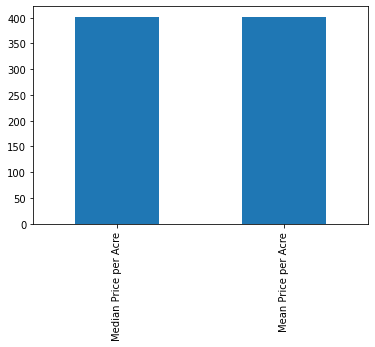

In [58]:
df_land["Statistic"].value_counts().plot.bar()

<AxesSubplot:>

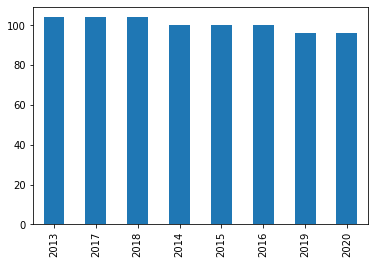

In [59]:
df_land["Year"].value_counts().plot.bar()

<AxesSubplot:xlabel='Statistic', ylabel='VALUE'>

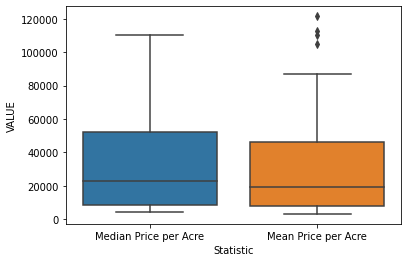

In [60]:
sns.boxplot(data=df_land, x = "Statistic", y = "VALUE")

<AxesSubplot:xlabel='VALUE', ylabel='Density'>

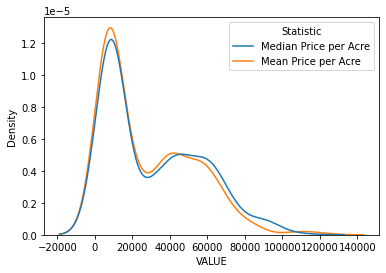

In [61]:
sns.kdeplot(data=df_land, hue = "Statistic", x = "VALUE")

In [62]:
df_land.describe()

,Year,C03388V04075,VALUE
count,804.000000,804.000000,804.000000
mean,2016.462687,2.000000,29635.868008
std,2.282611,0.846942,24933.862459
min,2013.000000,1.000000,3071.500000
25%,2014.000000,1.000000,8003.100000
50%,2016.000000,2.000000,19057.755404
75%,2018.000000,3.000000,48739.436007
max,2020.000000,3.000000,121510.858737


<AxesSubplot:xlabel='Year', ylabel='VALUE'>

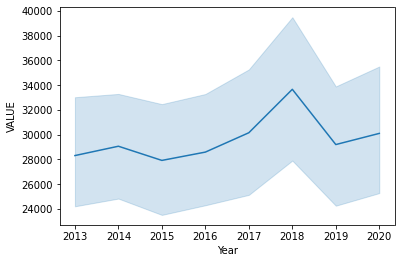

In [63]:
sns.lineplot(data=df_land, x="Year", y="VALUE")

<AxesSubplot:xlabel='Year', ylabel='VALUE'>

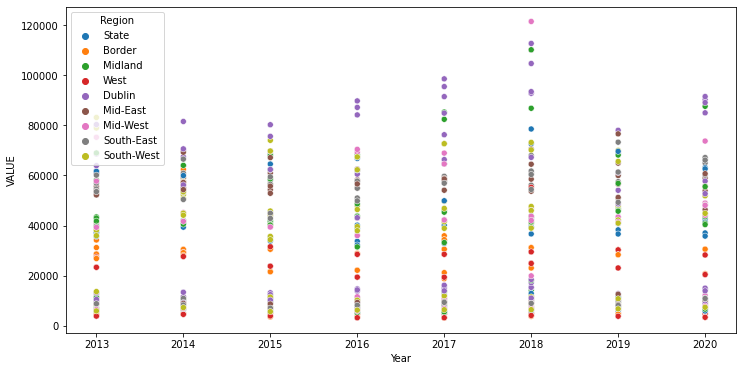

In [25]:
plt.rcParams["figure.figsize"] = (12,6)
sns.scatterplot(data=df_land, x="Year", y="VALUE", hue="Region")

<AxesSubplot:xlabel='Year'>

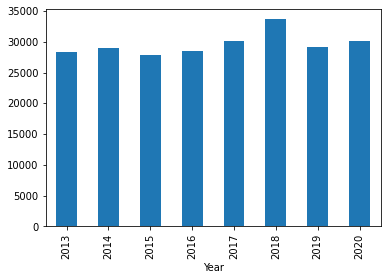

In [65]:
df_land.groupby("Year")["VALUE"].mean().plot.bar()

In [66]:
df_land["C03388V04075"].unique()

array([1, 2, 3], dtype=int64)

<AxesSubplot:>

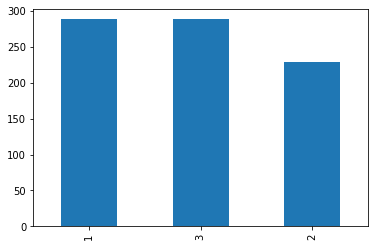

In [67]:
df_land["C03388V04075"].value_counts().plot.bar()

<AxesSubplot:xlabel='C03388V04075'>

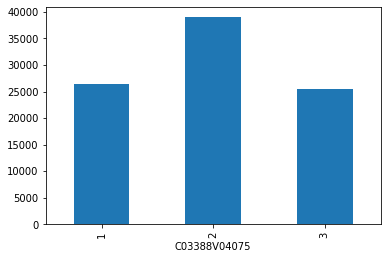

In [68]:
df_land.groupby("C03388V04075")["VALUE"].mean().plot.bar()

<AxesSubplot:xlabel='VALUE', ylabel='Density'>

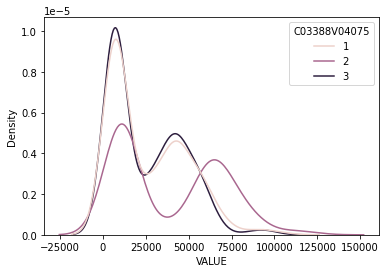

In [69]:
sns.kdeplot(data=df_land, hue = "C03388V04075", x = "VALUE")

<AxesSubplot:xlabel='C03388V04075', ylabel='VALUE'>

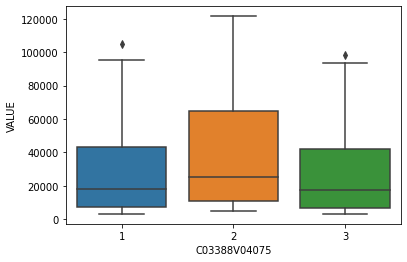

In [70]:
sns.boxplot(data=df_land, x = "C03388V04075", y = "VALUE")

In [71]:
df_land["Type of Land Use"].unique()

array(['All Land Types', 'Arable Land', 'Permanent Grassland'],
      dtype=object)

<AxesSubplot:xlabel='VALUE', ylabel='Density'>

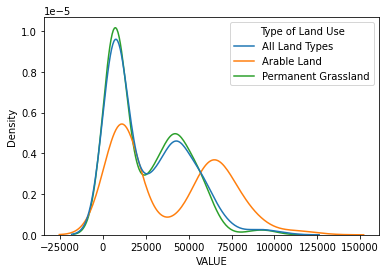

In [72]:
sns.kdeplot(data=df_land, hue = "Type of Land Use", x = "VALUE")

In [73]:
def to_C03388V04075(x):
    if x == "Permanent Grassland":
        return 3
    if x == "All Land Types":
        return 1
    return 2

In [74]:
df_land[df_land["C03388V04075"] != df_land["Type of Land Use"].apply(to_C03388V04075)]

,Statistic,Year,C03388V04075,Type of Land Use,C02196V02652,Region,VALUE


In [26]:
df_land.drop(columns=["C03388V04075"], inplace = True)

In [76]:
df_land["Region"].unique()

array(['State', 'Border', 'Midland', 'West', 'Dublin', 'Mid-East',
       'Mid-West', 'South-East', 'South-West'], dtype=object)

<AxesSubplot:>

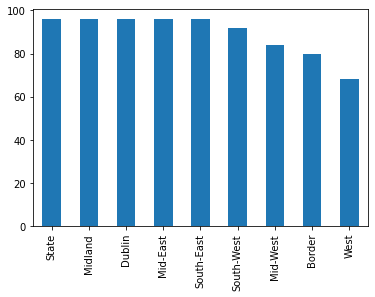

In [77]:
df_land["Region"].value_counts().plot.bar()

<AxesSubplot:xlabel='VALUE', ylabel='Density'>

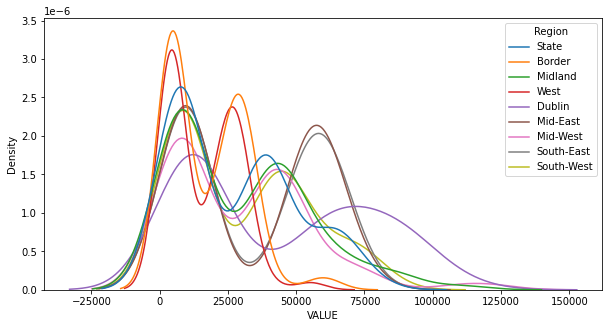

In [81]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=df_land, hue = "Region", x = "VALUE")

<AxesSubplot:xlabel='Region', ylabel='VALUE'>

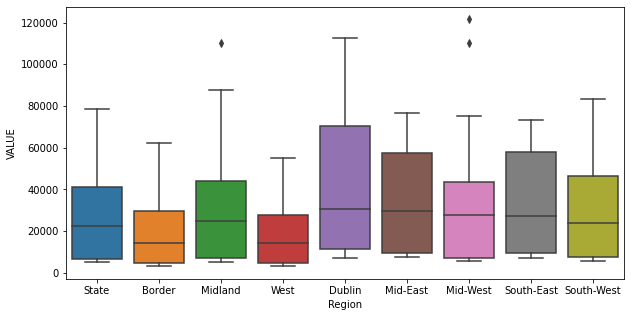

In [82]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_land, x = "Region", y = "VALUE")

In [83]:
df_land["C02196V02652"].unique().shape

(9,)

In [84]:
df_land["Region"].unique().shape

(9,)

<AxesSubplot:xlabel='C02196V02652', ylabel='VALUE'>

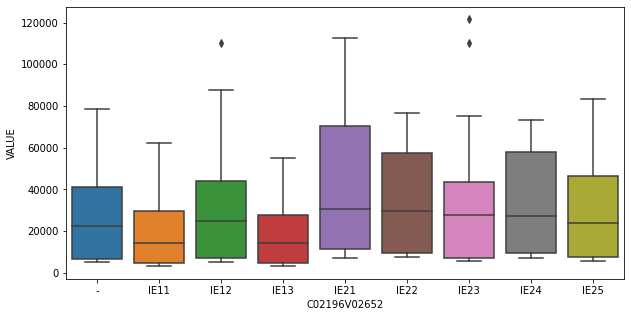

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_land, x = "C02196V02652", y = "VALUE")

In [27]:
df_land.drop(columns=["C02196V02652"], inplace = True)

In [28]:
df_land.corr()

,Year,VALUE
Year,1.000000,0.035918
VALUE,0.035918,1.000000


### Machine Learning

In [30]:
df_land

,Statistic,Year,Type of Land Use,Region,VALUE
0,Median Price per Acre,2013,All Land Types,State,6389.800000
1,Median Price per Acre,2013,All Land Types,Border,4685.200000
2,Median Price per Acre,2013,All Land Types,Midland,7114.600000
3,Median Price per Acre,2013,All Land Types,West,4496.500000
4,Median Price per Acre,2013,All Land Types,Dublin,10117.200000
...,...,...,...,...,...
859,Mean Price per Acre,2020,Permanent Grassland,Dublin,52726.851987
860,Mean Price per Acre,2020,Permanent Grassland,Mid-East,46379.950276
861,Mean Price per Acre,2020,Permanent Grassland,Mid-West,48077.317138
862,Mean Price per Acre,2020,Permanent Grassland,South-East,66125.399956


In [31]:
df = pd.get_dummies(df_land)

In [32]:
df

,Year,VALUE,Statistic_Mean Price per Acre,Statistic_Median Price per Acre,Type of Land Use_All Land Types,Type of Land Use_Arable Land,Type of Land Use_Permanent Grassland,Region_Border,Region_Dublin,Region_Mid-East,Region_Mid-West,Region_Midland,Region_South-East,Region_South-West,Region_State,Region_West
0,2013,6389.800000,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,2013,4685.200000,0,1,1,0,0,1,0,0,0,0,0,0,0,0
2,2013,7114.600000,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,2013,4496.500000,0,1,1,0,0,0,0,0,0,0,0,0,0,1
4,2013,10117.200000,0,1,1,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2020,52726.851987,1,0,0,0,1,0,1,0,0,0,0,0,0,0
860,2020,46379.950276,1,0,0,0,1,0,0,1,0,0,0,0,0,0
861,2020,48077.317138,1,0,0,0,1,0,0,0,1,0,0,0,0,0
862,2020,66125.399956,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [33]:
scaler = MinMaxScaler()

In [34]:
df["Year"] = scaler.fit_transform(df[["Year"]])

In [35]:
X = df.drop(columns=["VALUE"])
y = df["VALUE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [36]:
for model in models_dict:
    models_dict[model] = models_dict[model]().fit(X_train, y_train)

In [37]:
results = {"model":[],"r2":[],"mse":[],"mae":[]}
for model in models_dict:
    results["model"].append(model)
    for metric in metrics_dict:
        pred = models_dict[model].predict(X_test)
        results[metric].append(metrics_dict[metric](y_test, pred))

In [38]:
pd.DataFrame(results)

,model,r2,mse,mae
0,rf,-0.625430,1.237692e+09,31984.655067
1,knn,-0.055599,8.037916e+08,25186.310167
2,ada,0.160620,6.391501e+08,22767.677170
3,lr,0.145992,6.502889e+08,22767.606357


In [40]:
df["VALUE"].mean()

29635.868008289977

<BarContainer object of 15 artists>

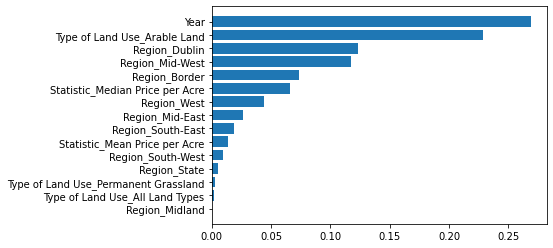

In [137]:
plt.barh(width=np.sort(models_dict["ada"].feature_importances_),
                      y=X.columns[np.argsort(models_dict["ada"].feature_importances_)])

In [160]:
parameters_dict = {"n_estimators":[20,50,100],
                   "learning_rate":[0.1,0.2,0.5,1]}

model = AdaBoostRegressor()
clf = GridSearchCV(model, parameters_dict, scoring='neg_mean_absolute_error')
clf.fit(X,y)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.5, 1],
                         'n_estimators': [20, 50, 100]},
             scoring='neg_mean_absolute_error')

In [161]:
clf.best_params_

{'learning_rate': 1, 'n_estimators': 100}

In [163]:
clf.best_score_

-29897.354435294757

### End

In [41]:
df = df[(df["Statistic_Mean Price per Acre"]==1)&(df["Type of Land Use_All Land Types"]==1)][["Year","VALUE"]]

In [42]:
df["Year"] = scaler.inverse_transform(df[["Year"]])

In [43]:
df = df.groupby("Year").mean().reset_index().rename(columns={"VALUE":"Land Price"})

In [44]:
df

,Year,Land Price
0,2013.0,24735.281700
1,2014.0,26153.927062
2,2015.0,23717.800962
3,2016.0,22761.334020
4,2017.0,24808.491920
5,2018.0,27986.827726
6,2019.0,24618.471287
7,2020.0,24845.948310


In [149]:
df.to_csv("land_price.csv")